In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
# jupyter nbconvert --to notebook --inplace --execute notebook/index-state.ipynb

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from crawler.utils.elasticsearch import ElasticSearchUtils

/home/ejpark/workspace/crawler_group/crawler/venv/lib/python3.8/site-packages/crawler-2.116.521-py3.8.egg/crawler/utils/elasticsearch_utils.py:25: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
from matplotlib import font_manager, rc

def set_plt_font():
    """matplotlib 한글 폰트 설정"""
    # 한글 폰트 설정
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    return

set_plt_font()

In [5]:
def custom_display(df: pd.DataFrame) -> None:
    pd.set_option('display.float_format', '{:.1f}'.format)    
    display(df.style.set_properties(**{'text-align': 'right'}))
    return

In [6]:
# plt.rcParams.update({'font.size': 15})
# plt.figure(figsize=(20, 20))

# pd.set_option('precision', 0)
# pd.options.display.float_format = '{:,.0f}'.format

%matplotlib inline
plt.style.use('ggplot')

In [7]:
es = ElasticSearchUtils(
    host='https://crawler-es.cloud.ncsoft.com:9200', 
    http_auth='elastic:searchT2020'
)        

In [8]:
index_list = es.get_index_list()

/home/ejpark/workspace/crawler_group/crawler/venv/lib/python3.8/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: this request accesses system indices: [.apm-agent-configuration, .apm-custom-link, .async-search, .kibana_1, .kibana_task_manager_1, .security-7], but in a future major version, direct access to system indices will be prevented by default
  warnings.warn(message, category=ElasticsearchWarning)


In [9]:
index_size = es.get_index_size()

,count
count,37.000000
mean,200330.513514
std,257089.712664
min,4044.000000
25%,41864.000000
50%,147705.000000
75%,226704.000000
max,1304358.000000


,count
index,
crawler-bbs-mlbpark_bullpen-2021,5133
crawler-bbs-mlbpark_kbo-2020,17672
crawler-bbs-mlbpark_kbo-2021,41864
crawler-bbs-mlbpark_mlb-2020,13506
crawler-bbs-mlbpark_mlb-2021,4044
crawler-daum-culture-2021,42742
crawler-daum-economy-2021,173268
crawler-daum-international-2021,151244
crawler-daum-it-2021,26715


<AxesSubplot:ylabel='index'>

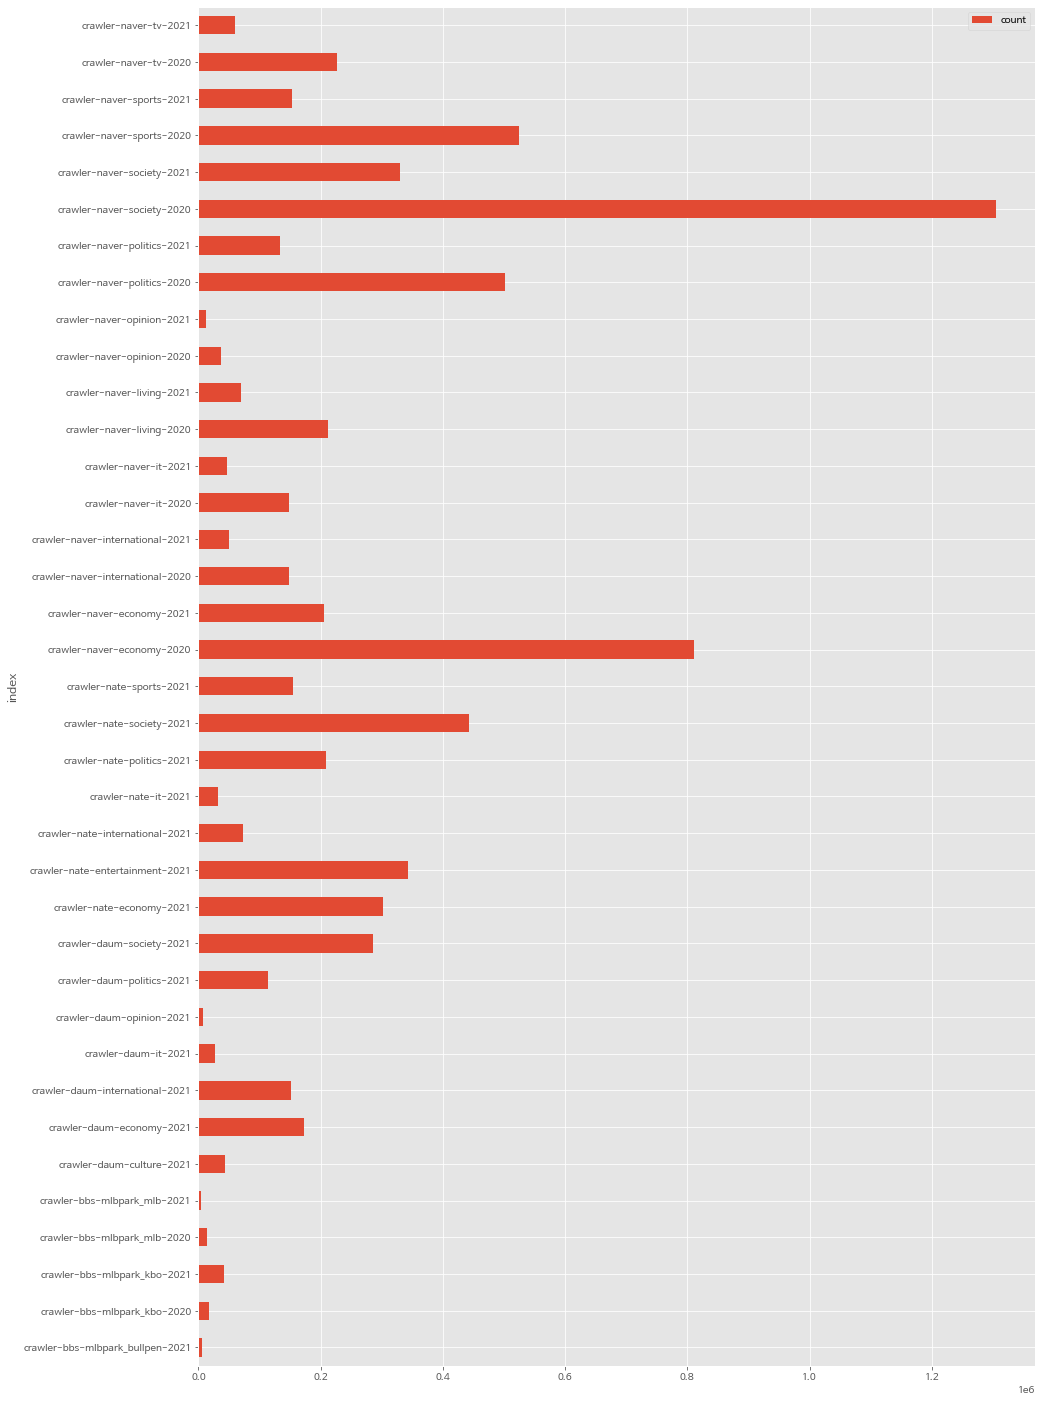

In [10]:
df_size = pd.DataFrame(index_size).set_index('index')

custom_display(df_size.describe())

custom_display(df_size)

df_size['count'] = df_size['count'].astype(float)

df_size.plot(kind='barh', figsize=(15, 25))

,count
index,
crawler-bbs-mlbpark_bullpen-2021,5133.000000
crawler-bbs-mlbpark_kbo-2020,17672.000000
crawler-bbs-mlbpark_kbo-2021,41864.000000
crawler-bbs-mlbpark_mlb-2020,13506.000000
crawler-bbs-mlbpark_mlb-2021,4044.000000
crawler-daum-culture-2021,42742.000000
crawler-daum-economy-2021,173268.000000
crawler-daum-international-2021,151244.000000
crawler-daum-it-2021,26715.000000


<AxesSubplot:ylabel='index'>

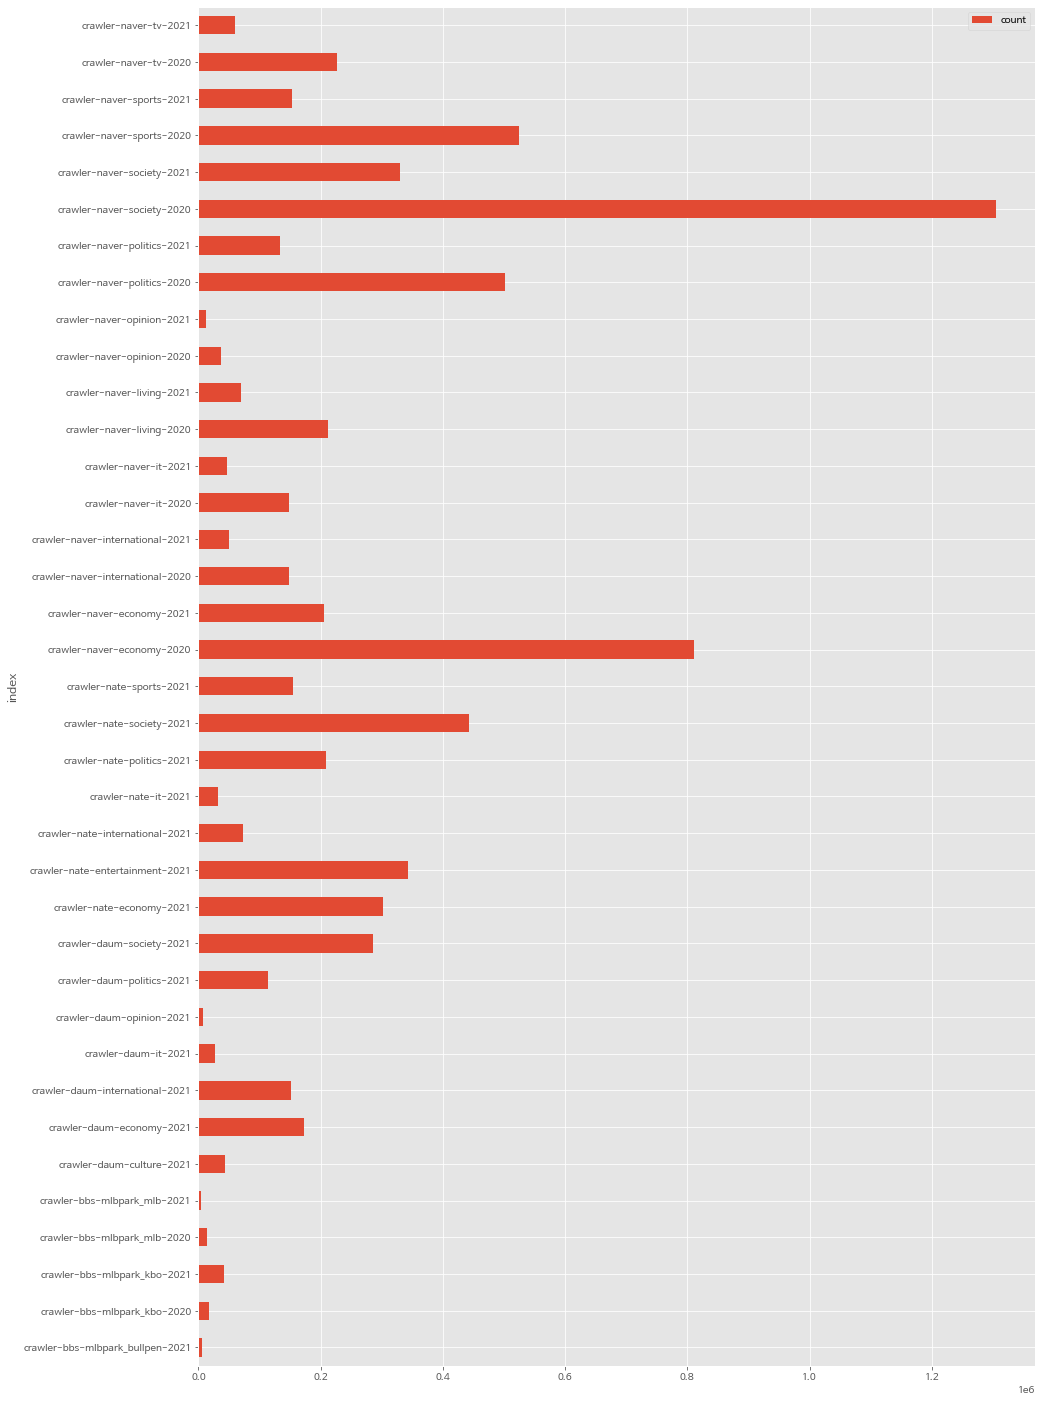

In [11]:
custom_display(df_size)

df_size['count'] = df_size['count'].astype(float)

df_size.plot(kind='barh', figsize=(15, 25))

In [12]:
index='crawler-naver-economy-2021'
date_range='2021-01-01~2021-03-30'

data = es.get_date_histogram(index=index, column='date', interval='day', date_range=date_range)

,count
count,77.000000
mean,2659.376623
std,2305.988851
min,0.000000
25%,980.000000
50%,1131.000000
75%,5028.000000
max,7040.000000


,count
date,
2021-01-01,848
2021-01-02,484
2021-01-03,936
2021-01-04,1092
2021-01-05,1125
2021-01-06,1125
2021-01-07,1084
2021-01-08,1083
2021-01-09,543


<AxesSubplot:ylabel='date'>

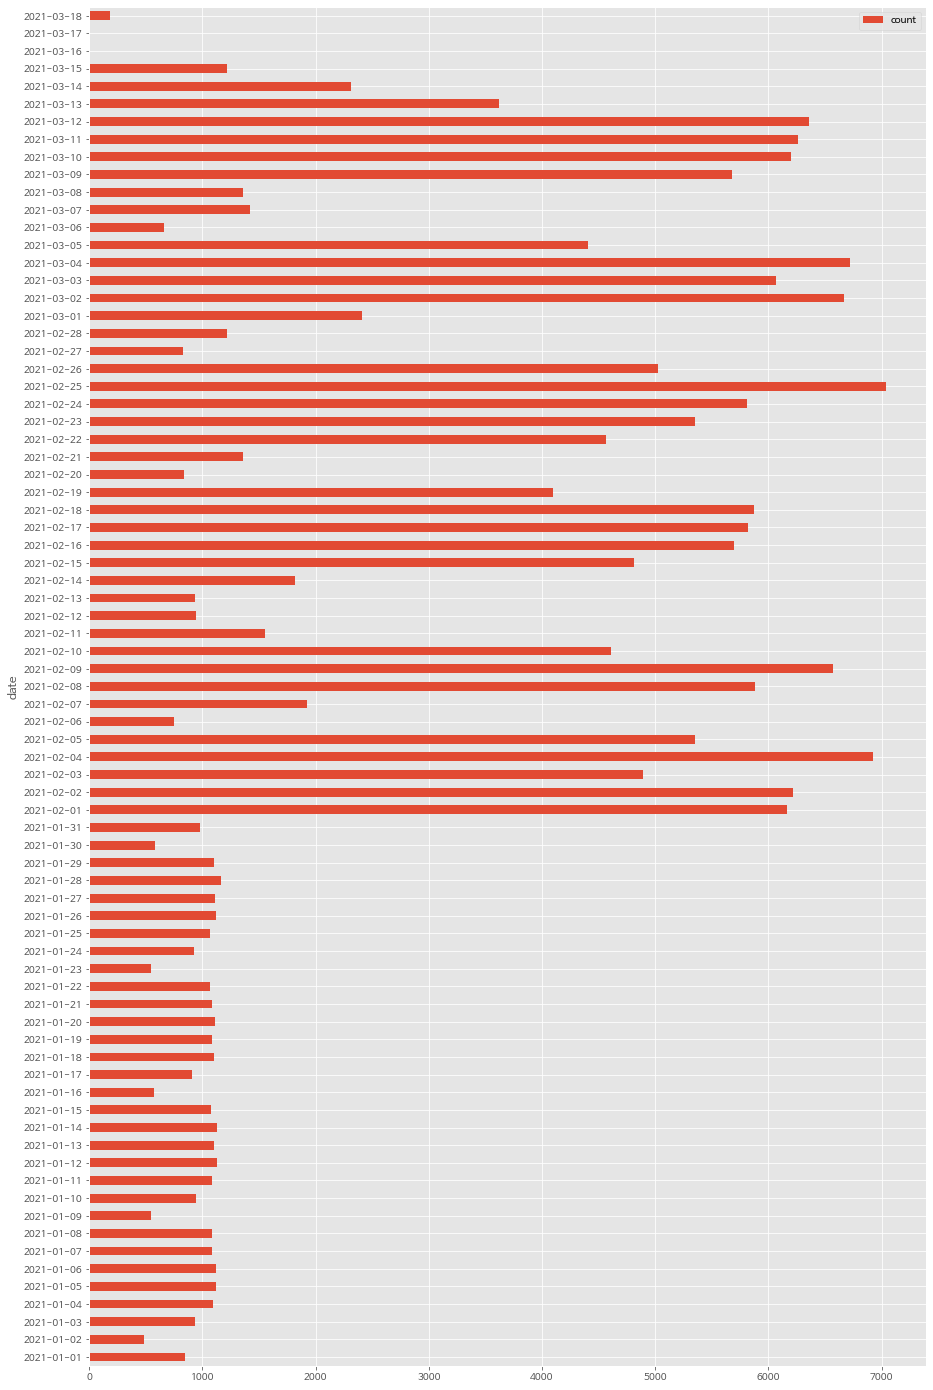

In [13]:
df_date = pd.DataFrame(data['rows']).set_index('date')

custom_display(df_date.describe())
custom_display(df_date)

df_date.plot(kind='barh', figsize=(15, 25))

In [14]:
# es.get_column_list(index_list=index)

In [15]:
index='crawler-naver-economy-2021'
date_range='2021-01-01~2021-03-30'

data = es.get_column_count(index=index, column='category', date_column='date', date_range=date_range)

In [16]:
from collections import defaultdict

cnt = defaultdict(int)

for item in data:
    for c in item['category'].split(','):
        cnt[c] += item['count']

,count
count,8.000000
mean,27919.750000
std,21975.139744
min,6147.000000
25%,14260.250000
50%,17867.500000
75%,42351.250000
max,69186.000000


,count
category,
경제/경제 일반,69186
경제/글로벌 경제,6147
경제/금융,17450
경제/생활경제,15978
경제/증권,41100
경제/부동산,18285
경제/중기/벤처,9107
경제/산업/재계,46105


<AxesSubplot:xlabel='category'>

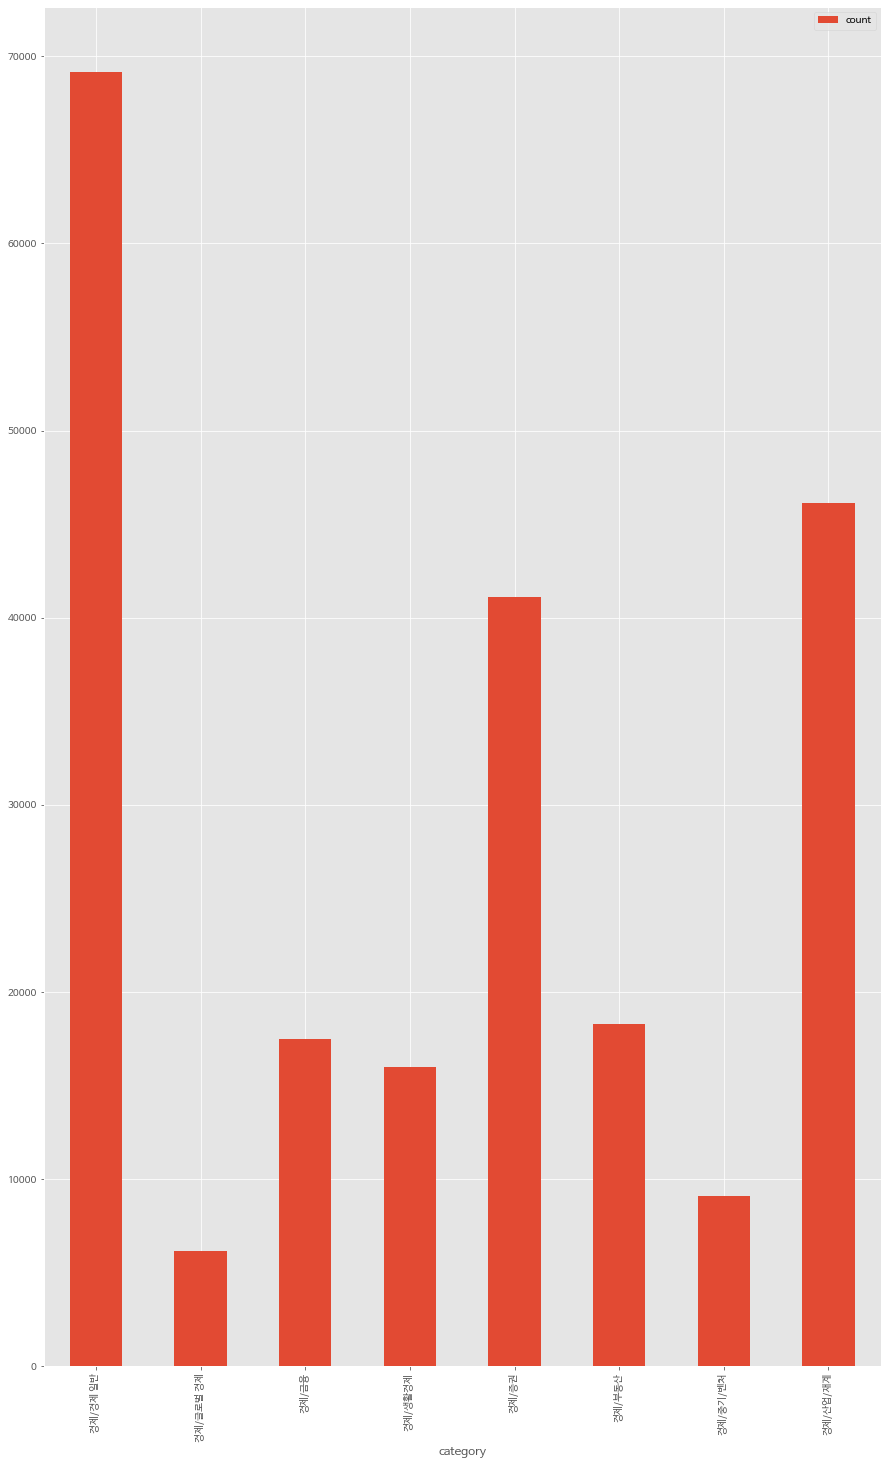

In [17]:
df_category = pd.DataFrame([{'category': k, 'count': v} for k, v in cnt.items()]).set_index('category')

custom_display(df_category.describe())
custom_display(df_category)

df_category.plot(kind='bar', figsize=(15, 25))